## Look at CBCF Data

## Demo Folder

In [1]:
ls 2024

 Datentr„ger in Laufwerk D: ist DATEN
 Volumeseriennummer: FC92-E262

 Verzeichnis von D:\potthast_d\research\cbcf\2024

19.02.2025  13:53    <DIR>          .
19.02.2025  13:53    <DIR>          ..
02.05.2024  09:57           148.606 D0-2024-05-01-dwd_crossborder.final_internal.json
02.05.2024  09:57            15.560 D0-2024-05-01-dwd_crossborder.info.final_internal.json
02.05.2024  23:01            53.533 D0-2024-05-02-dwd_crossborder.final_internal.json
02.05.2024  23:01             7.715 D0-2024-05-02-dwd_crossborder.info.final_internal.json
03.05.2024  23:02            40.409 D0-2024-05-03-dwd_crossborder.final_internal.json
03.05.2024  23:02             7.523 D0-2024-05-03-dwd_crossborder.info.final_internal.json
04.05.2024  23:01            52.233 D0-2024-05-04-dwd_crossborder.final_internal.json
04.05.2024  23:01             7.971 D0-2024-05-04-dwd_crossborder.info.final_internal.json
05.05.2024  23:00            55.890 D0-2024-05-05-dwd_crossborder.final_internal.json
05.05.20

## Check File Contents

In [2]:
import json
from pathlib import Path

folder = Path("./2024")

# Pick one D0 and one D1 file to inspect
sample_files = [
    folder / "D0-2024-05-01-dwd_crossborder.final_internal.json",
    folder / "D1-2024-05-01-dwd_crossborder.final_internal.json"
]

for f in sample_files:
    print(f"\n=== {f.name} ===")
    with open(f, encoding="utf-8") as fh:
        data = json.load(fh)
    
    # Print only top-level keys and a snippet
    if isinstance(data, dict):
        print("Keys:", list(data.keys()))
        for k, v in list(data.items())[:3]:  # show first 3 entries
            print(f"  {k}: {str(v)[:200]} ...")
    elif isinstance(data, list):
        print("Type: list, length:", len(data))
        print("First entry:", str(data[0])[:200], "...")



=== D0-2024-05-01-dwd_crossborder.final_internal.json ===
Keys: ['type', 'features', 'totalFeatures', 'numberMatched', 'numberReturned', 'timeStamp', 'crs']
  type: FeatureCollection ...
  features: [{'type': 'Feature', 'id': 'crossborder.final_internal.1064790024456', 'geometry': {'type': 'Polygon', 'coordinates': [[[18.250603, 45.776477], [18.465791, 47.240789], [17.144259, 47.271499], [16.4845 ...
  totalFeatures: 204 ...

=== D1-2024-05-01-dwd_crossborder.final_internal.json ===
Keys: ['type', 'features', 'totalFeatures', 'numberMatched', 'numberReturned', 'timeStamp', 'crs']
  type: FeatureCollection ...
  features: [{'type': 'Feature', 'id': 'crossborder.final_internal.1064790024203', 'geometry': {'type': 'Polygon', 'coordinates': [[[13.310032, 43.588535], [14.445368, 43.516274], [13.222172, 44.849885], [12.9060 ...
  totalFeatures: 85 ...


## Install Geopandas

In [3]:
#! pip install geopandas

## CheckPolygon File

In [4]:
import geopandas as gpd

# Load one file directly
gdf = gpd.read_file("./2024/D0-2024-05-01-dwd_crossborder.final_internal.json")
print(gdf.head())
print(gdf.columns)


                                         id  \
0  crossborder.final_internal.1064790024456   
1  crossborder.final_internal.1064790024457   
2  crossborder.final_internal.1064790024458   
3  crossborder.final_internal.1064790024459   
4  crossborder.final_internal.1064790024460   

                              SPECIALID  TOP CONVECTIONFRACTION LIKELINESS  \
0  70f8a06a-0eb0-40ce-a23e-d14ada3b921d  360               CLST     likely   
1  23332c42-baa3-4670-99e5-f9a567de50fa  360               CLST     likely   
2  6299a11b-1ac9-4a13-8e67-6a9a503b0ae8  360               CLST     likely   
3  c4fbece5-ccd0-4e56-957f-8216706aa8f4  360               CLST     likely   
4  b7ac2f50-6d31-4a4a-b927-55fb89ba2aa7  240               ISOL     likely   

  AMENDMENT_STATUS           ISSUE_TIMESTAMP           VALID_TIMESTAMP  \
0        AMENDMENT 2024-05-01 22:00:00+00:00 2024-05-02 12:00:00+00:00   
1        AMENDMENT 2024-05-01 22:00:00+00:00 2024-05-02 15:00:00+00:00   
2        AMENDMENT 2024-05

## Visualize with Cartopy

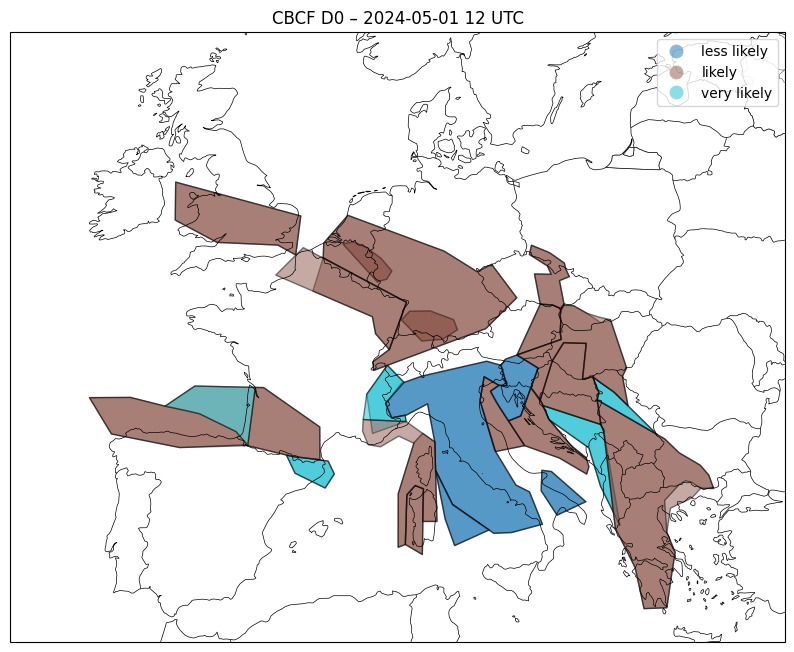

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd  # <-- needed

# Load one file (GeoJSON)
file = "2024/D0-2024-05-01-dwd_crossborder.final_internal.json"
gdf = gpd.read_file(file)

# Make sure timestamps are parsed
gdf["VALID_TIMESTAMP"] = pd.to_datetime(gdf["VALID_TIMESTAMP"])

# Select only one valid time (optional)
subset = gdf[gdf["VALID_TIMESTAMP"].dt.hour == 12]  # e.g. 12 UTC polygons

# --- Plot with Cartopy ---
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add background features
ax.set_extent([-15, 30, 35, 60], crs=ccrs.PlateCarree())  # Europe bbox
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.3, alpha=0.5)

# Plot polygons (colored by LIKELINESS)
subset.plot(ax=ax, column="LIKELINESS", legend=True, alpha=0.5, edgecolor="black")

plt.title("CBCF D0 – 2024-05-01 12 UTC")
fig.savefig("cbcf_d0_20240501_12utc.png", dpi=200, bbox_inches="tight")
plt.show()


In [6]:
# One row
row = gdf.iloc[0]

print(type(row.geometry))      # shapely.geometry.polygon.Polygon
print(row.geometry.area)       # area (in degrees², unless reprojected)
print(row.geometry.bounds)     # bounding box (minx, miny, maxx, maxy)
print(list(row.geometry.exterior.coords)[:5])  # first 5 coordinate pairs


<class 'shapely.geometry.polygon.Polygon'>
7.3683887199394995
(15.791611, 43.90642, 19.313717, 47.271499)
[(18.250603, 45.776477), (18.465791, 47.240789), (17.144259, 47.271499), (16.484513, 46.52997), (15.791611, 44.934903)]


In [7]:
coords = list(row.geometry.exterior.coords)
for lon, lat in coords[:10]:  # print first 10
    print(lon, lat)


18.250603 45.776477
18.465791 47.240789
17.144259 47.271499
16.484513 46.52997
15.791611 44.934903
15.950023 44.682366
19.313717 43.90642
19.101126 44.924435
19.196197 45.223596
18.829728 45.870765


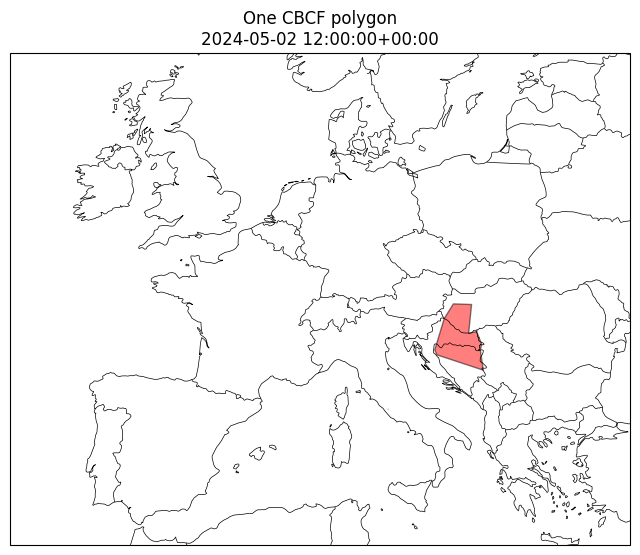

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Load file
file = "2024/D0-2024-05-01-dwd_crossborder.final_internal.json"
gdf = gpd.read_file(file)

# Parse timestamps
gdf["VALID_TIMESTAMP"] = pd.to_datetime(gdf["VALID_TIMESTAMP"])

# Select one polygon (first row for demo)
poly = gdf.iloc[0:1]   # still a GeoDataFrame with 1 row

# --- Plot with Cartopy ---
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Map background
ax.set_extent([-15, 30, 35, 60], crs=ccrs.PlateCarree())  # Europe
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Plot the polygon
poly.plot(ax=ax, facecolor="red", edgecolor="black", alpha=0.5)

plt.title(f"One CBCF polygon\n{poly.iloc[0]['VALID_TIMESTAMP']}")
plt.show()


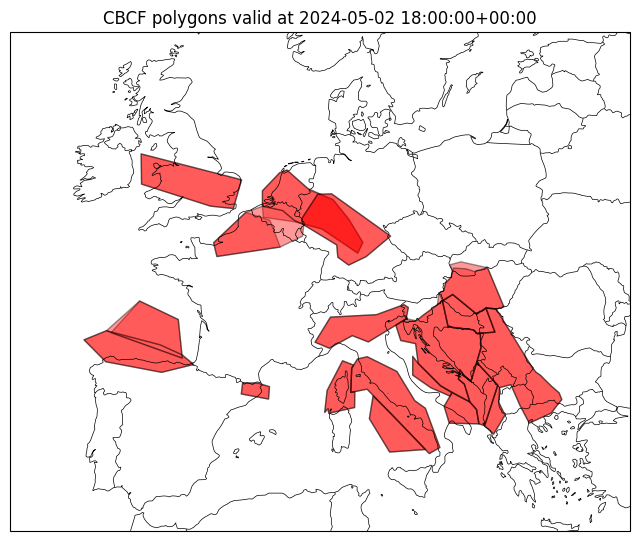

Animation finished.


In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import time
from IPython.display import clear_output, display

# Load file
file = "./2024/D0-2024-05-01-dwd_crossborder.final_internal.json"
gdf = gpd.read_file(file)
gdf["VALID_TIMESTAMP"] = pd.to_datetime(gdf["VALID_TIMESTAMP"])

# Sort by time
gdf = gdf.sort_values("VALID_TIMESTAMP")

# Unique forecast hours
times = gdf["VALID_TIMESTAMP"].unique()

# Figure once
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

for t in times:
    ax.clear()
    ax.set_extent([-15, 30, 35, 60], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)

    # Subset polygons for this valid time
    subset = gdf[gdf["VALID_TIMESTAMP"] == t]

    # Plot polygons
    subset.plot(ax=ax, facecolor="red", edgecolor="black", alpha=0.4)

    # Title
    ax.set_title(f"CBCF polygons valid at {t}")

    clear_output(wait=True)
    display(fig)
    time.sleep(2)  # 2 sec pause

plt.close(fig)
print("Animation finished.")


## Check all files

In [10]:
import geopandas as gpd
import pandas as pd
import glob

files = sorted(glob.glob("./2024/*.final_internal.json"))

summary = []
for f in files:
    if ".info." in f:   # skip sidecar info files
        continue
    try:
        gdf = gpd.read_file(f)
        gdf["VALID_TIMESTAMP"] = pd.to_datetime(gdf["VALID_TIMESTAMP"])
        summary.append({
            "file": f.split("\\")[-1],
            "features": len(gdf),
            "min_time": gdf["VALID_TIMESTAMP"].min(),
            "max_time": gdf["VALID_TIMESTAMP"].max(),
        })
    except Exception as e:
        summary.append({"file": f.split("\\")[-1], "error": str(e)})

df_summary = pd.DataFrame(summary)
display(df_summary.head(20))


,file,features,min_time,max_time
0,D0-2024-05-01-dwd_crossborder.final_internal.json,204,2024-05-02 06:00:00+00:00,2024-05-02 18:00:00+00:00
1,D0-2024-05-02-dwd_crossborder.final_internal.json,75,2024-05-03 06:00:00+00:00,2024-05-03 18:00:00+00:00
2,D0-2024-05-03-dwd_crossborder.final_internal.json,54,2024-05-04 06:00:00+00:00,2024-05-04 18:00:00+00:00
3,D0-2024-05-04-dwd_crossborder.final_internal.json,73,2024-05-05 06:00:00+00:00,2024-05-05 18:00:00+00:00
4,D0-2024-05-05-dwd_crossborder.final_internal.json,79,2024-05-06 06:00:00+00:00,2024-05-06 18:00:00+00:00
5,D0-2024-05-06-dwd_crossborder.final_internal.json,70,2024-05-07 06:00:00+00:00,2024-05-07 18:00:00+00:00
6,D0-2024-05-07-dwd_crossborder.final_internal.json,51,2024-05-08 06:00:00+00:00,2024-05-08 18:00:00+00:00
7,D0-2024-05-08-dwd_crossborder.final_internal.json,37,2024-05-09 06:00:00+00:00,2024-05-09 18:00:00+00:00
8,D0-2024-05-09-dwd_crossborder.final_internal.json,31,2024-05-10 06:00:00+00:00,2024-05-10 18:00:00+00:00
9,D0-2024-05-10-dwd_crossborder.final_internal.json,43,2024-05-11 06:00:00+00:00,2024-05-11 18:00:00+00:00


run,D0,D1
date,,
2024-05-01,204,85
2024-05-02,75,78
2024-05-03,54,49
2024-05-04,73,69
2024-05-05,79,65
2024-05-06,70,56
2024-05-07,51,51
2024-05-08,37,35
2024-05-09,31,30


<Axes: xlabel='date'>

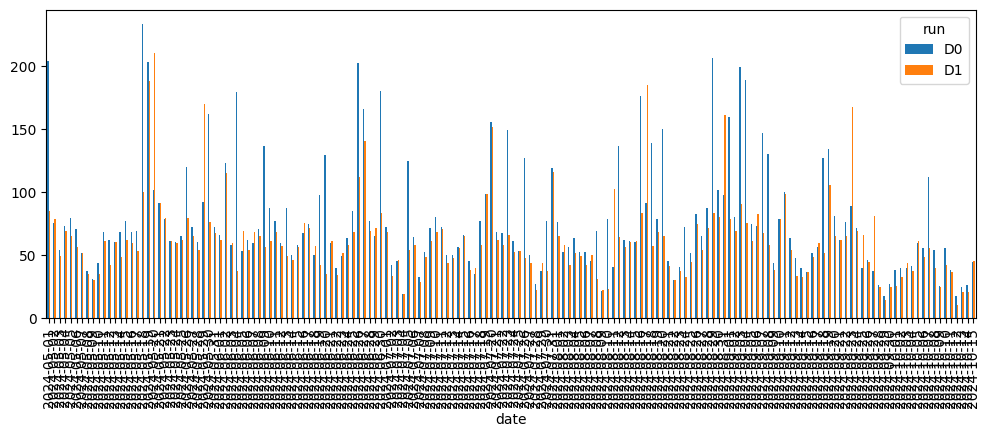

In [11]:
import re

df_summary["date"] = df_summary["file"].str.extract(r"(\d{4}-\d{2}-\d{2})")
df_summary["run"] = df_summary["file"].str.extract(r"(D\d)")

pivot = df_summary.pivot_table(
    index="date", 
    columns="run", 
    values="features", 
    aggfunc="first"
).sort_index()

display(pivot.head(50))  # first 20 days
pivot.plot(kind="bar", figsize=(12,4))


In [12]:
#!pip install folium mapclassify

In [ ]:
import geopandas as gpd

gdf = gpd.read_file("./2024/D0-2024-05-01-dwd_crossborder.final_internal.json")

# pick the first polygon's valid time
t0 = gdf.iloc[0]["VALID_TIMESTAMP"]

# select all polygons with this valid time
subset = gdf[gdf["VALID_TIMESTAMP"] == t0]

print("Time:", t0, "Polygons:", len(subset))
subset.explore(
    column="LIKELINESS",
    categorical=True,
    categories=["likely", "possible", "unlikely"],  # force consistent order
    cmap=["red", "yellow", "blue"],               # same length as categories
    style_kwds={"fillOpacity": 0.1, "weight": 0.5},
    highlight_kwds={"fillOpacity": 0.0, "weight": 0.5}
)



In [ ]:
sample_files = df_summary["file"].sample(5, random_state=0)

for f in sample_files:
    gdf = gpd.read_file("" + f)
    print(f, len(gdf), gdf["VALID_TIMESTAMP"].min(), gdf["VALID_TIMESTAMP"].max())
    display(gdf.iloc[0:1].explore())  # if you want interactive map
